# 13 Pandas
* Series
* Dataframe
* Access Column and Row
* Datatype
* info() head() tail() and describe()
* string-to-date conversion
* Exploratory data analysis
    * Import Data [House Sales Dataset](https://www.kaggle.com/harlfoxem/housesalesprediction)
    * head and tail
    * Data Instpection
    * Data preparation
    * Exploratory data analysis
    * Histogram
    * Statistic
* Visualization with Seaborn
    * correlation matrix
    * Scatter plot
    * FIltering the outlier
    * Color palette
    * Group by
    * Reset Index
    * Data Interpretation

# Installation
```bash
conda install pandas seaborn
```

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
#plt.style.use('ggplot')
plt.style.use('seaborn-paper')

In [2]:
import pandas as pd

# Series


In [3]:
# create a series from a list, please note the datatype (dtype)
s = pd.Series([1, 3, 5])
s

0    1
1    3
2    5
dtype: int64

In [4]:
# checking datatype of the series
type(s)

pandas.core.series.Series

# Data type

In [ ]:
%%html
<style>
table {float:left}
</style>

| Pandas dtype | Usage |
|:---|:---|
| object | Text or mixed numeric and non-numeric values |
| int64 | Integer numbers |
| float64 | Floating point numbers |
| bool | True/False values |
| datetime64 | Date and time values |
| timedelta[ns] | Differences between two datetimes |
| category | Finite list of text values |

In [5]:
# casting the datatyoe of the series to 'int32'
s = pd.Series([1, 3, 5], dtype='int32')
s

0    1
1    3
2    5
dtype: int32

In [6]:
# another way for casting the datatyoe of the series
s.astype('float32')

0    1.0
1    3.0
2    5.0
dtype: float32

In [7]:
# the number 3.1 is initialized to be float64
s = pd.Series([1, 3, 5, 3.1])
s

0    1.0
1    3.0
2    5.0
3    3.1
dtype: float64

In [8]:
# the number 'hello' is initialized to be object
s = pd.Series([1, 3, 5, 3.1,'hello'])
s

0        1
1        3
2        5
3      3.1
4    hello
dtype: object

In [9]:
s.index

RangeIndex(start=0, stop=5, step=1)

# Dataframe

In [10]:
d={
    'A': 1.,
    'B':[1, 3, 5, 3.1,'hello'],
}
df = pd.DataFrame(d)
print(df)

     A      B
0  1.0      1
1  1.0      3
2  1.0      5
3  1.0    3.1
4  1.0  hello


In [11]:
df

,A,B
0,1.0,1
1,1.0,3
2,1.0,5
3,1.0,3.1
4,1.0,hello


# Access Column

In [12]:
# column as a data member
df.B

0        1
1        3
2        5
3      3.1
4    hello
Name: B, dtype: object

In [13]:
# column as a key
df['B']

0        1
1        3
2        5
3      3.1
4    hello
Name: B, dtype: object

In [14]:
# data frame as a matrix
df.iloc[:,1]

0        1
1        3
2        5
3      3.1
4    hello
Name: B, dtype: object

# Access Row

In [15]:
# access the first row by integer of location
df.iloc[0,:]

A    1
B    1
Name: 0, dtype: object

In [16]:
# access the first row by label
df.loc[0]

A    1
B    1
Name: 0, dtype: object

# info() head() tail() and describe()

In [17]:
d={
    'A': [4, None, 6],
    'B':['2020-11-1','2020-11-21','2020-11-30'],
    'C':['hello','21/11/2020','30/11/2020'],
}
df = pd.DataFrame(d)
df

,A,B,C
0,4.0,2020-11-1,hello
1,NaN,2020-11-21,21/11/2020
2,6.0,2020-11-30,30/11/2020


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       2 non-null      float64
 1   B       3 non-null      object 
 2   C       3 non-null      object 
dtypes: float64(1), object(2)
memory usage: 200.0+ bytes


In [20]:
df.head(2)

,A,B,C
0,4.0,2020-11-1,hello
1,NaN,2020-11-21,21/11/2020


In [21]:
df.tail(2)

,A,B,C
1,NaN,2020-11-21,21/11/2020
2,6.0,2020-11-30,30/11/2020


In [22]:
df.describe()

,A
count,2.000000
mean,5.000000
std,1.414214
min,4.000000
25%,4.500000
50%,5.000000
75%,5.500000
max,6.000000


# string-to-datetime conversion

In [23]:
df.B.head()

0     2020-11-1
1    2020-11-21
2    2020-11-30
Name: B, dtype: object

In [24]:
pd.to_datetime(df.B, format='%Y-%m-%d')

0   2020-11-01
1   2020-11-21
2   2020-11-30
Name: B, dtype: datetime64[ns]

In [26]:
pd.to_datetime(df.C, format='%d/%m/%Y', errors='coerce')

0          NaT
1   2020-11-21
2   2020-11-30
Name: C, dtype: datetime64[ns]

In [27]:
df2=df
df2.B=pd.to_datetime(df.B, format='%Y-%m-%d')
df2.C=pd.to_datetime(df.C, format='%d/%m/%Y', errors='coerce')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   A       2 non-null      float64       
 1   B       3 non-null      datetime64[ns]
 2   C       2 non-null      datetime64[ns]
dtypes: datetime64[ns](2), float64(1)
memory usage: 200.0 bytes


# Import Data form excel, csv, sql
* [House Sales Dataset](https://www.kaggle.com/harlfoxem/housesalesprediction)

In [ ]:
#pd.read_

In [28]:
df = pd.read_csv('kc_house_data.csv',infer_datetime_format=True)

In [29]:
df = pd.read_csv('kc_house_data.csv')

# Head and Tail

In [30]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [31]:
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


# Data Inspection

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

# converting series to datatime

df.date example: 20140521T000000

In [33]:
df.date.head()

0    20141013T000000
1    20141209T000000
2    20150225T000000
3    20141209T000000
4    20150218T000000
Name: date, dtype: object

In [34]:
df2=df.set_index('id')
#df2.date=pd.to_datetime(df.date, format='%Y%m%dT%H%M%S')
df2.date=pd.to_datetime(df2.date, format='%Y%m%dT%H%M%S', errors='coerce')

In [35]:
df2.date.head()

id
7129300520   2014-10-13
6414100192   2014-12-09
5631500400   2015-02-25
2487200875   2014-12-09
1954400510   2015-02-18
Name: date, dtype: datetime64[ns]

In [36]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21613 non-null  datetime64[ns]
 1   price          21613 non-null  float64       
 2   bedrooms       21613 non-null  int64         
 3   bathrooms      21613 non-null  float64       
 4   sqft_living    21613 non-null  int64         
 5   sqft_lot       21613 non-null  int64         
 6   floors         21613 non-null  float64       
 7   waterfront     21613 non-null  int64         
 8   view           21613 non-null  int64         
 9   condition      21613 non-null  int64         
 10  grade          21613 non-null  int64         
 11  sqft_above     21613 non-null  int64         
 12  sqft_basement  21613 non-null  int64         
 13  yr_built       21613 non-null  int64         
 14  yr_renovated   21613 non-null  int64         
 15  zipco

# Exploratory data analysis

In [37]:
df2.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Histogram

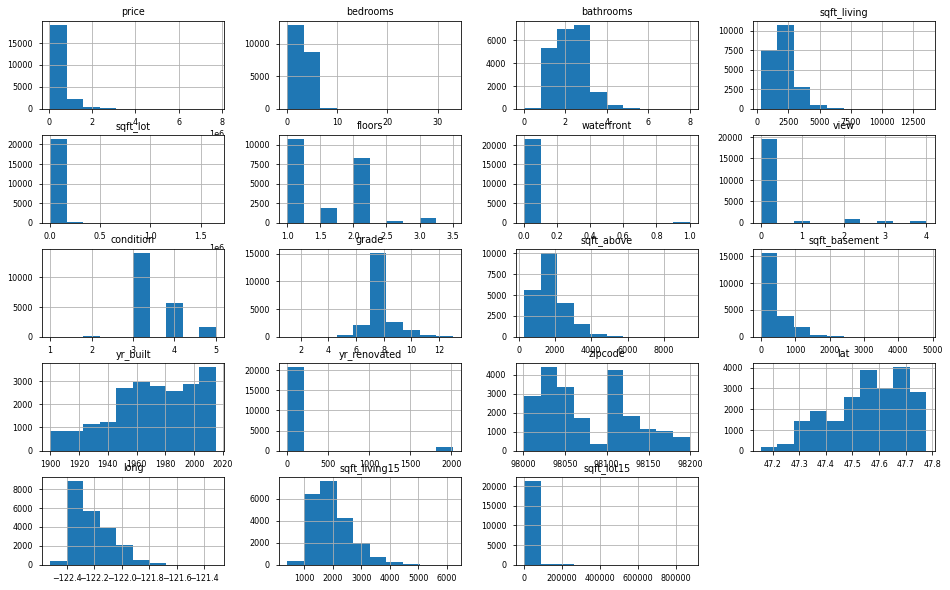

In [38]:
df2.hist(figsize=(16,10));

# Statistic

In [39]:
df2.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Padas and Seaborn
select color 
* https://www.hsluv.org/
* https://seaborn.pydata.org/tutorial/color_palettes.html

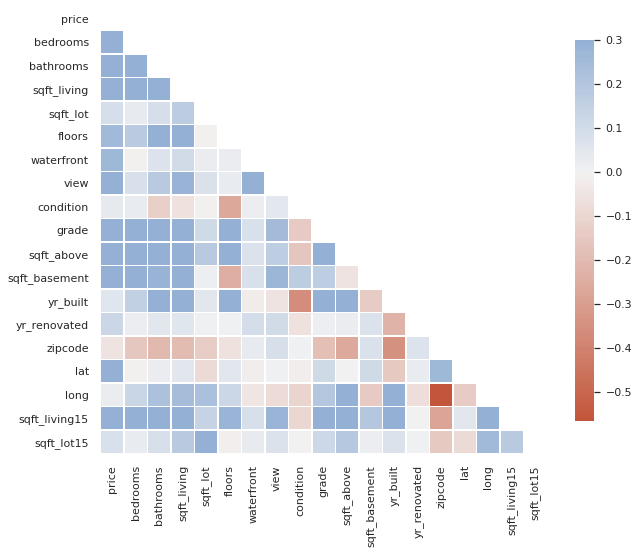

In [40]:
import seaborn as sns
sns.set_theme(style="white")

# Compute the correlation matrix
corr = df2.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette( 20, 250, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .7});

# Feature Columns

* id: Unique ID for each home sold
* date: Date of the home sale
* price: Price of each home sold
* bedrooms: Number of bedrooms
* bathrooms: Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living: Square footage of the apartments interior living space
* sqft_lot: Square footage of the land space
* floors: Number of floors
* waterfront: - A dummy variable for whether the apartment was overlooking the waterfront or not
* view: An index from 0 to 4 of how good the view of the property was
* condition: - An index from 1 to 5 on the condition of the apartment,
* grade: An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of * construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above: The square footage of the interior housing space that is above ground level
* sqft_basement: The square footage of the interior housing space that is below ground level
* yr_built: The year the house was initially built
* yr_renovated: The year of the house’s last renovation
* zipcode: What zipcode area the house is in
* lat: Lattitude
* long: Longitude
* sqft_living15: The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15: The square footage of the land lots of the nearest 15 neighbors

# Visualization

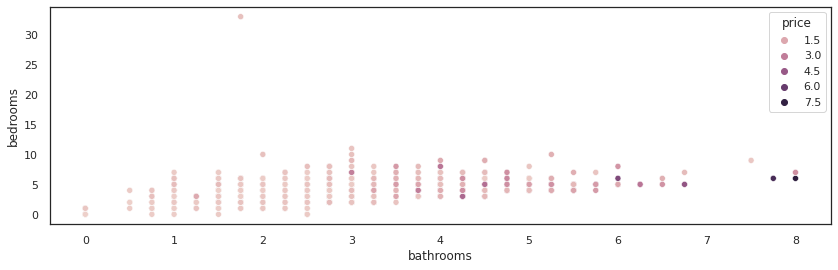

In [41]:
f, ax = plt.subplots(figsize=(14, 4))
sns.scatterplot(data=df2, x="bathrooms", y="bedrooms", hue="price");

# FIltering the outlier

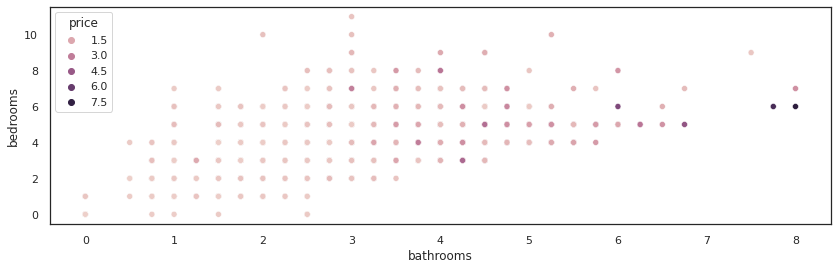

In [42]:
f, ax = plt.subplots(figsize=(14, 4))
sns.scatterplot(data=df2[df2.bedrooms<20], x="bathrooms", y="bedrooms", hue="price");

# Color Palette

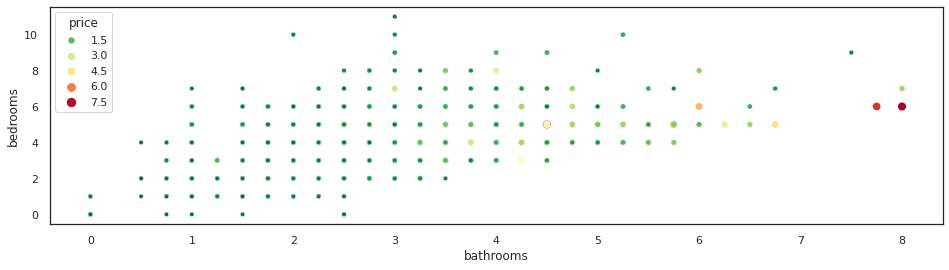

In [43]:
# seting hue color
f, ax = plt.subplots(figsize=(16, 4))
cmap = sns.color_palette("RdYlGn_r", as_cmap=True)
sns.scatterplot(data=df2[df2.bedrooms<20], x="bathrooms", y="bedrooms", hue="price", size="price", palette=cmap);

# Group by ['bathrooms', 'bedrooms']

In [44]:
df2.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [45]:
df3=df2[['bathrooms', 'bedrooms','price']]
df3

,bathrooms,bedrooms,price
id,,,
7129300520,1.00,3,221900.0
6414100192,2.25,3,538000.0
5631500400,1.00,2,180000.0
2487200875,3.00,4,604000.0
1954400510,2.00,3,510000.0
...,...,...,...
263000018,2.50,3,360000.0
6600060120,2.50,4,400000.0
1523300141,0.75,2,402101.0


In [46]:
df3.head(20)

,bathrooms,bedrooms,price
id,,,
7129300520,1.00,3,221900.0
6414100192,2.25,3,538000.0
5631500400,1.00,2,180000.0
2487200875,3.00,4,604000.0
1954400510,2.00,3,510000.0
7237550310,4.50,4,1225000.0
1321400060,2.25,3,257500.0
2008000270,1.50,3,291850.0
2414600126,1.00,3,229500.0


In [47]:
df4=df3.groupby(by=['bathrooms','bedrooms']).mean()
df4

price
bathrooms bedrooms              
0.00      0         5.203714e+05
          1         2.796667e+05
0.50      1         2.550000e+05
          2         1.910000e+05
          4         3.125000e+05
...                          ...
6.75      7         8.000000e+05
7.50      9         4.500000e+05
7.75      6         6.885000e+06
8.00      6         7.700000e+06
          7         2.280000e+06

[144 rows x 1 columns]

# Reset Index

In [48]:
df4.reset_index(inplace=True)
df4

,bathrooms,bedrooms,price
0,0.00,0,5.203714e+05
1,0.00,1,2.796667e+05
2,0.50,1,2.550000e+05
3,0.50,2,1.910000e+05
4,0.50,4,3.125000e+05
...,...,...,...
139,6.75,7,8.000000e+05
140,7.50,9,4.500000e+05
141,7.75,6,6.885000e+06
142,8.00,6,7.700000e+06


In [50]:
df4.head(20)

,bathrooms,bedrooms,price
0,0.00,0,520371.428571
1,0.00,1,279666.666667
2,0.50,1,255000.000000
3,0.50,2,191000.000000
4,0.50,4,312500.000000
5,0.75,0,265000.000000
6,0.75,1,251053.703704
7,0.75,2,327513.500000
8,0.75,3,311512.562500
9,0.75,4,331250.000000


# Data Interpretaion

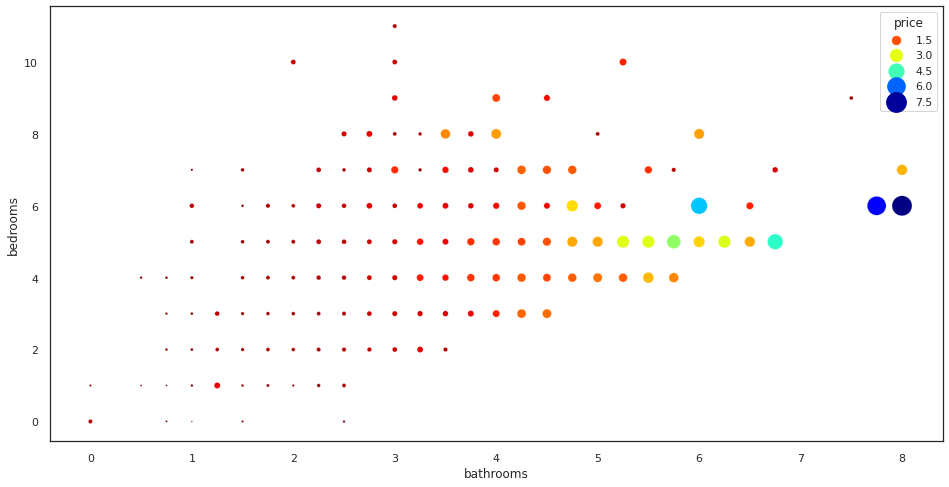

In [49]:
f, ax = plt.subplots(figsize=(16, 8))
cmap = sns.color_palette("jet_r", as_cmap=True)
sns.scatterplot(
    data=df4[df4.bedrooms<20], 
    x="bathrooms", 
    y="bedrooms", 
    hue="price", 
    size="price",
    sizes=(0, 400),
    palette=cmap,
);